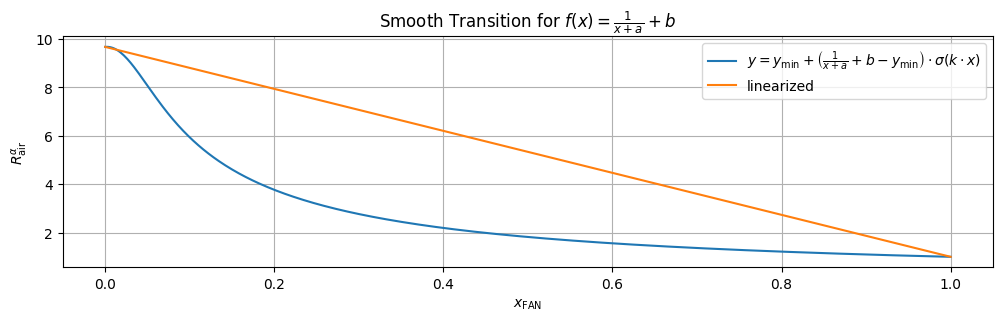

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
a = 0.07
b = 7/107
y_min = 5
k = 45

y_int = y_min + (1/a + b - y_min) * 0.5
y_1 = y_min + (1/(1+a) + b - y_min) / (1 + np.exp(-k))

# Define the function with smooth transition
def smooth_function(x):
    return y_min + (1 / (x + a) + b - y_min) / (1 + np.exp(-k * x))

# Linear function: R(x) = q + mx
R0 = smooth_function(0)
R1 = smooth_function(1)
q = R0
m = R1 - R0
def linear_smooth_function(x):
    return q + m*x

# Generate x values and compute y values for the function
x_values = np.linspace(0, 1, 500)
y_values = smooth_function(x_values)
y_lin_values = linear_smooth_function(x_values)

# Plot the function
plt.figure(figsize=(12, 3))
plt.plot(x_values, y_values, label=r'$y = y_{\min} + \left(\frac{1}{x + a} + b - y_{\min}\right) \cdot \sigma(k \cdot x)$')
plt.plot(x_values, y_lin_values, label='linearized')
plt.xlabel(r'$x_\mathrm{FAN}$')
plt.ylabel(r'$R_\mathrm{air}^\alpha$')
plt.title('Smooth Transition for $f(x) = \\frac{1}{x + a} + b$')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Save coefficients
data = pd.DataFrame({'y_min': [y_min], 'a': [a], 'b': [b], 'k': [k], 'y_int': [y_int]})
data.to_csv('fan_coefficients.csv', index=False)

data_linear = pd.DataFrame({'q': [q], 'm': [m]})
data_linear.to_csv('fan_linear_coefficients.csv', index=False)